# 数据处理

In [24]:
import pandas as pd

# 读取.xlsx文件
df1 = pd.read_excel('聚类1.xlsx')
df2 = pd.read_excel('聚类2.xlsx')
df3 = pd.read_excel('聚类3.xlsx')
df4 = pd.read_excel('聚类4.xlsx')

# 删除第二列为空的行
df1 = df1.dropna(subset=[df1.columns[1]])
df2 = df2.dropna(subset=[df2.columns[1]])
df3 = df3.dropna(subset=[df3.columns[1]])
df4 = df4.dropna(subset=[df4.columns[1]])
# 删除第三列为0的行
df1 = df1[df1.iloc[:, 2] != 0]
df2 = df2[df2.iloc[:, 2] != 0]
df3 = df3[df3.iloc[:, 2] != 0]
df4 = df4[df4.iloc[:, 2] != 0]

# 保存修改后的数据到新的.xlsx文件
df1.to_excel('聚类1_1.xlsx', index=False)
df2.to_excel('聚类2_1.xlsx', index=False)
df3.to_excel('聚类3_1.xlsx', index=False)
df4.to_excel('聚类4_1.xlsx', index=False)

# 对聚类1进行处理

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'  # 使用宋体字体作为示例

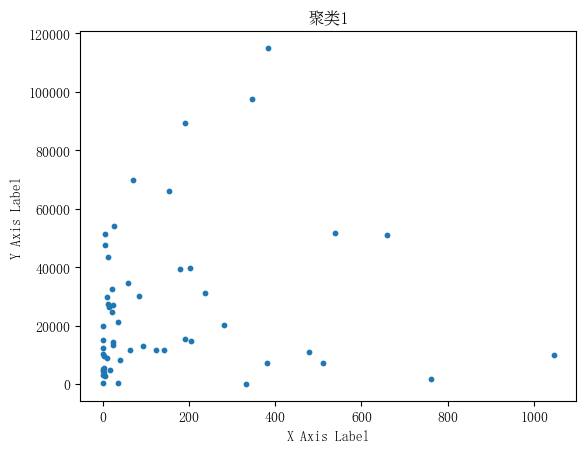

In [26]:
# 读取数据
data = pd.read_excel('聚类1_1.xlsx', engine='openpyxl')

# 获取x和y的数据
x = data.iloc[:, 1]  # 第一列为x
y = data.iloc[:, 2]  # 第二列为y

# 设置点的大小
point_size = 10  # 你可以调整这个值来改变点的大小

# 绘制散点图
plt.scatter(x, y, s=point_size)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('聚类1')
plt.show()

In [27]:
# 获取x和y的数据
x = data.iloc[:, 1].values  # 第一列为x
y = data.iloc[:, 2].values  # 第二列为y

# 重塑x为2维数组
x_matrix = x.reshape(-1, 1)
y_matrix = y.reshape(-1, 1)
combined_matrix = np.hstack((x_matrix, y_matrix))
print(combined_matrix.shape)

(54, 2)


## 多项式进行拟合

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [29]:
# # 按x值排序
# sorted_indices = np.argsort(combined_matrix[:, 0])
# sorted_matrix = combined_matrix[sorted_indices]

# x = sorted_matrix[:, 0]
# y = sorted_matrix[:, 1]

# # 使用numpy的polyfit进行多项式拟合
# coefficients = np.polyfit(x, y, 4)

# # 使用拟合的系数创建一个多项式函数
# polynomial = np.poly1d(coefficients)

# y_fit = polynomial(x)

# # 绘制原始数据和拟合的多项式曲线
# plt.scatter(x, y, label="Data", color='blue',s=point_size)
# plt.plot(x, y_fit, label="Fitted polynomial", color='red')
# plt.legend()
# plt.title('Polynomial Fit')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

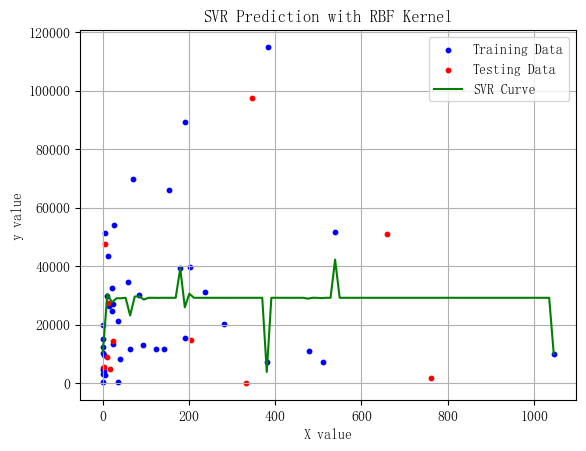

[29148.24338236]


In [30]:
from sklearn.model_selection import train_test_split  # 导入train_test_split函数
from sklearn.svm import SVR  # 导入SVR模型
from scipy.optimize import curve_fit  # 导入curve_fit函数
# 分割特征和目标值
X = combined_matrix[:, 0].reshape(-1, 1)
y = combined_matrix[:, 1]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVR模型，使用 'rbf' 核
svr = SVR(kernel='rbf', C=1e5, gamma=0.5)

# 训练模型
svr.fit(X_train, y_train)

# 进行预测
y_pred = svr.predict(X_test)

# 绘制训练数据、测试数据和SVR预测曲线
plt.scatter(X_train, y_train, color='blue', label='Training Data',s=point_size)
plt.scatter(X_test, y_test, color='red', label='Testing Data',s=point_size)

# 使用 SVR 预测整个X范围内的y值以得到完整的曲线
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = svr.predict(X_range)
plt.plot(X_range, y_range_pred, color='green', label='SVR Curve')

plt.xlabel('X value')
plt.ylabel('y value')
plt.title('SVR Prediction with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()


# 提供一个新的x值
new_x_value = np.array([[500]])  # 假设你想预测x=5时的y值
# 使用模型进行预测
predicted_y_value = svr.predict(new_x_value)
print(predicted_y_value)

## 数据处理（插值计算）

### 计算预测值

In [31]:
# 读取.xlsx文件
file_path = '聚类1_1.xlsx'  # 请替换为你的文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 使用第二列作为x
x = df.iloc[:, 1].values  # 0-based index，第二列的索引为1

# 遍历表格的每一行，计算预测值并填入第四列
predicted_y_values = []
for index, row in df.iterrows():
    new_x_value = np.array([[row[2]]])  # 使用第三列的值作为新的 x
    predicted_y_value = svr.predict(new_x_value)
    predicted_y_values.append(predicted_y_value[0])

df['预测值'] = predicted_y_values  # 将预测值添加到第四列

# 保存修改后的.xlsx文件
df.to_excel("聚类1_2.xlsx", index=False, engine='openpyxl')

In [32]:
# 读取.xlsx文件
df = pd.read_excel('聚类1_2.xlsx')

# 计算第二列减去第四列的结果，并将结果放入第五列
df['残差值'] = df.iloc[:, 2] - df.iloc[:, 3]

# 保存修改后的文件
df.to_excel('聚类1_3.xlsx', index=False)

In [33]:
# 删除第二列和第三列
df.drop(columns=[df.columns[1], df.columns[2], df.columns[3]], inplace=True)

# 保存修改后的文件
df.to_excel('聚类1_4.xlsx', index=False)

In [34]:
# 读取原始的.xlsx文件
df = pd.read_excel('聚类1_4.xlsx')

# 使用groupby将数据按照患者分组，并对残差值进行求和
grouped = df.groupby('患者')['残差值'].sum().reset_index()

# 保存统计结果到一个新的.xlsx文件
grouped.to_excel('聚类1_5.xlsx', index=False)

# 对聚类2进行处理

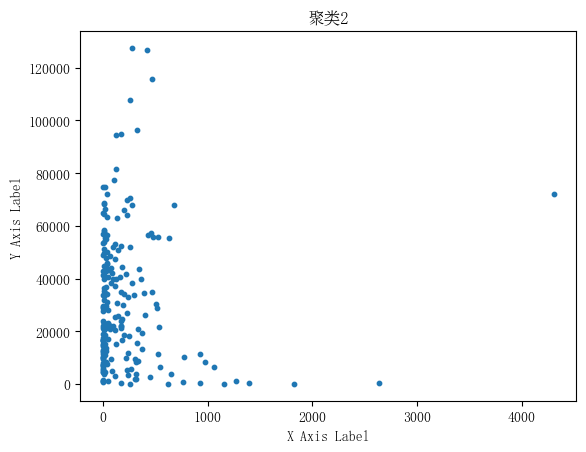

In [35]:
# 读取数据
data = pd.read_excel('聚类2_1.xlsx', engine='openpyxl')

# 获取x和y的数据
x = data.iloc[:, 1]  # 第一列为x
y = data.iloc[:, 2]  # 第二列为y

# 设置点的大小
point_size = 10  # 你可以调整这个值来改变点的大小

# 绘制散点图
plt.scatter(x, y, s=point_size)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('聚类2')
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [37]:
# 获取x和y的数据
x = data.iloc[:, 1].values  # 第一列为x
y = data.iloc[:, 2].values  # 第二列为y

# 重塑x为2维数组
x_matrix = x.reshape(-1, 1)
y_matrix = y.reshape(-1, 1)
combined_matrix = np.hstack((x_matrix, y_matrix))
print(combined_matrix.shape)

(215, 2)


In [38]:
# # 按x值排序
# sorted_indices = np.argsort(combined_matrix[:, 0])
# sorted_matrix = combined_matrix[sorted_indices]

# x = sorted_matrix[:, 0]
# y = sorted_matrix[:, 1]

# # 使用numpy的polyfit进行多项式拟合
# coefficients = np.polyfit(x, y, 5)

# # 使用拟合的系数创建一个多项式函数
# polynomial = np.poly1d(coefficients)

# y_fit = polynomial(x)

# # 绘制原始数据和拟合的多项式曲线
# plt.scatter(x, y, label="Data", color='blue',s=point_size)
# plt.plot(x, y_fit, label="Fitted polynomial", color='red')
# plt.legend()
# plt.title('Polynomial Fit')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

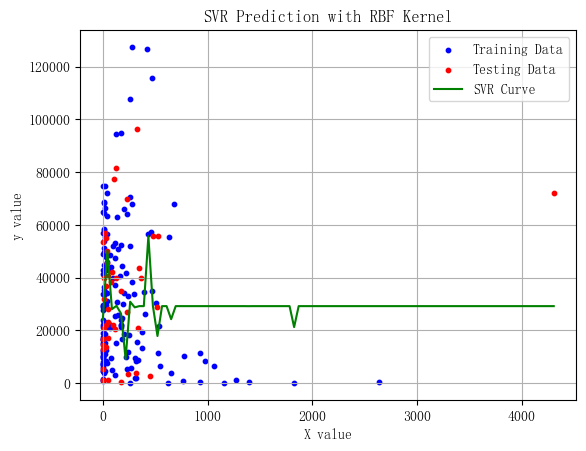

[29173.87096876]


In [39]:
from sklearn.model_selection import train_test_split  # 导入train_test_split函数
from sklearn.svm import SVR  # 导入SVR模型
from scipy.optimize import curve_fit  # 导入curve_fit函数
# 分割特征和目标值
X = combined_matrix[:, 0].reshape(-1, 1)
y = combined_matrix[:, 1]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVR模型，使用 'rbf' 核
svr = SVR(kernel='rbf', C=1e5, gamma=0.5)

# 训练模型
svr.fit(X_train, y_train)

# 进行预测
y_pred = svr.predict(X_test)

# 绘制训练数据、测试数据和SVR预测曲线
plt.scatter(X_train, y_train, color='blue', label='Training Data',s=point_size)
plt.scatter(X_test, y_test, color='red', label='Testing Data',s=point_size)

# 使用 SVR 预测整个X范围内的y值以得到完整的曲线
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = svr.predict(X_range)
plt.plot(X_range, y_range_pred, color='green', label='SVR Curve')

plt.xlabel('X value')
plt.ylabel('y value')
plt.title('SVR Prediction with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()


# 提供一个新的x值
new_x_value = np.array([[500]])  # 假设你想预测x=5时的y值
# 使用模型进行预测
predicted_y_value = svr.predict(new_x_value)
print(predicted_y_value)

In [40]:
# 读取.xlsx文件
file_path = '聚类2_1.xlsx'  # 请替换为你的文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 使用第二列作为x
x = df.iloc[:, 1].values  # 0-based index，第二列的索引为1

# 遍历表格的每一行，计算预测值并填入第四列
predicted_y_values = []
for index, row in df.iterrows():
    new_x_value = np.array([[row[2]]])  # 使用第三列的值作为新的 x
    predicted_y_value = svr.predict(new_x_value)
    predicted_y_values.append(predicted_y_value[0])

df['预测值'] = predicted_y_values  # 将预测值添加到第四列

# 保存修改后的.xlsx文件
df.to_excel("聚类2_2.xlsx", index=False, engine='openpyxl')
# 读取.xlsx文件
df = pd.read_excel('聚类2_2.xlsx')

# 计算第二列减去第四列的结果，并将结果放入第五列
df['残差值'] = df.iloc[:, 2] - df.iloc[:, 3]

# 保存修改后的文件
df.to_excel('聚类2_3.xlsx', index=False)
# 删除第二列和第三列
df.drop(columns=[df.columns[1], df.columns[2], df.columns[3]], inplace=True)

# 保存修改后的文件
df.to_excel('聚类2_4.xlsx', index=False)
# 读取原始的.xlsx文件
df = pd.read_excel('聚类2_4.xlsx')

# 使用groupby将数据按照患者分组，并对残差值进行求和
grouped = df.groupby('患者')['残差值'].sum().reset_index()

# 保存统计结果到一个新的.xlsx文件
grouped.to_excel('聚类2_5.xlsx', index=False)

# 对聚类3进行处理

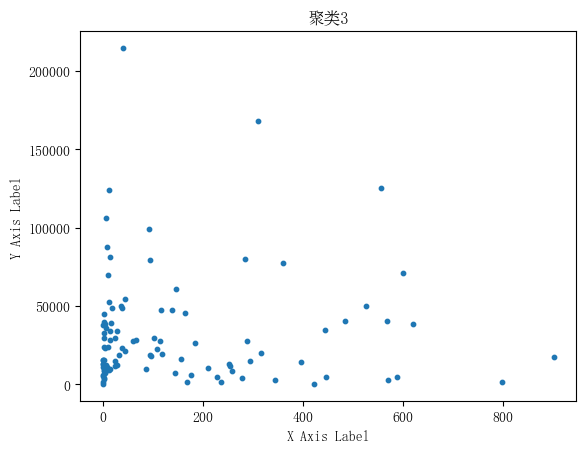

In [41]:
# 读取数据
data = pd.read_excel('聚类3_1.xlsx', engine='openpyxl')

# 获取x和y的数据
x = data.iloc[:, 1]  # 第一列为x
y = data.iloc[:, 2]  # 第二列为y

# 设置点的大小
point_size = 10  # 你可以调整这个值来改变点的大小

# 绘制散点图
plt.scatter(x, y, s=point_size)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('聚类3')
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [43]:
# # 获取x和y的数据
# x = data.iloc[:, 1].values  # 第一列为x
# y = data.iloc[:, 2].values  # 第二列为y

# # 重塑x为2维数组
# x_matrix = x.reshape(-1, 1)
# y_matrix = y.reshape(-1, 1)
# combined_matrix = np.hstack((x_matrix, y_matrix))
# print(combined_matrix.shape)
# # 按x值排序
# sorted_indices = np.argsort(combined_matrix[:, 0])
# sorted_matrix = combined_matrix[sorted_indices]

# x = sorted_matrix[:, 0]
# y = sorted_matrix[:, 1]

# # 使用numpy的polyfit进行多项式拟合
# coefficients = np.polyfit(x, y, 5)

# # 使用拟合的系数创建一个多项式函数
# polynomial = np.poly1d(coefficients)

# y_fit = polynomial(x)

# # 绘制原始数据和拟合的多项式曲线
# plt.scatter(x, y, label="Data", color='blue',s=point_size)
# plt.plot(x, y_fit, label="Fitted polynomial", color='red')
# plt.legend()
# plt.title('Polynomial Fit')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

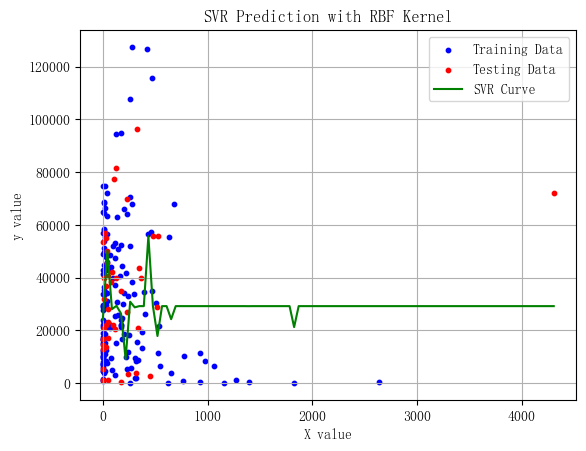

[29173.87096876]


In [44]:
from sklearn.model_selection import train_test_split  # 导入train_test_split函数
from sklearn.svm import SVR  # 导入SVR模型
from scipy.optimize import curve_fit  # 导入curve_fit函数
# 分割特征和目标值
X = combined_matrix[:, 0].reshape(-1, 1)
y = combined_matrix[:, 1]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVR模型，使用 'rbf' 核
svr = SVR(kernel='rbf', C=1e5, gamma=0.5)

# 训练模型
svr.fit(X_train, y_train)

# 进行预测
y_pred = svr.predict(X_test)

# 绘制训练数据、测试数据和SVR预测曲线
plt.scatter(X_train, y_train, color='blue', label='Training Data',s=point_size)
plt.scatter(X_test, y_test, color='red', label='Testing Data',s=point_size)

# 使用 SVR 预测整个X范围内的y值以得到完整的曲线
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = svr.predict(X_range)
plt.plot(X_range, y_range_pred, color='green', label='SVR Curve')

plt.xlabel('X value')
plt.ylabel('y value')
plt.title('SVR Prediction with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()


# 提供一个新的x值
new_x_value = np.array([[500]])  # 假设你想预测x=5时的y值
# 使用模型进行预测
predicted_y_value = svr.predict(new_x_value)
print(predicted_y_value)

In [45]:
# 读取.xlsx文件
file_path = '聚类3_1.xlsx'  # 请替换为你的文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 使用第二列作为x
x = df.iloc[:, 1].values  # 0-based index，第二列的索引为1

# 遍历表格的每一行，计算预测值并填入第四列
predicted_y_values = []
for index, row in df.iterrows():
    new_x_value = np.array([[row[2]]])  # 使用第三列的值作为新的 x
    predicted_y_value = svr.predict(new_x_value)
    predicted_y_values.append(predicted_y_value[0])

df['预测值'] = predicted_y_values  # 将预测值添加到第四列

# 保存修改后的.xlsx文件
df.to_excel("聚类3_2.xlsx", index=False, engine='openpyxl')
# 读取.xlsx文件
df = pd.read_excel('聚类3_2.xlsx')

# 计算第二列减去第四列的结果，并将结果放入第五列
df['残差值'] = df.iloc[:, 2] - df.iloc[:, 3]

# 保存修改后的文件
df.to_excel('聚类3_3.xlsx', index=False)
# 删除第二列和第三列
df.drop(columns=[df.columns[1], df.columns[2], df.columns[3]], inplace=True)

# 保存修改后的文件
df.to_excel('聚类3_4.xlsx', index=False)
# 读取原始的.xlsx文件
df = pd.read_excel('聚类3_4.xlsx')

# 使用groupby将数据按照患者分组，并对残差值进行求和
grouped = df.groupby('患者')['残差值'].sum().reset_index()

# 保存统计结果到一个新的.xlsx文件
grouped.to_excel('聚类3_5.xlsx', index=False)

# 对聚类四进行处理

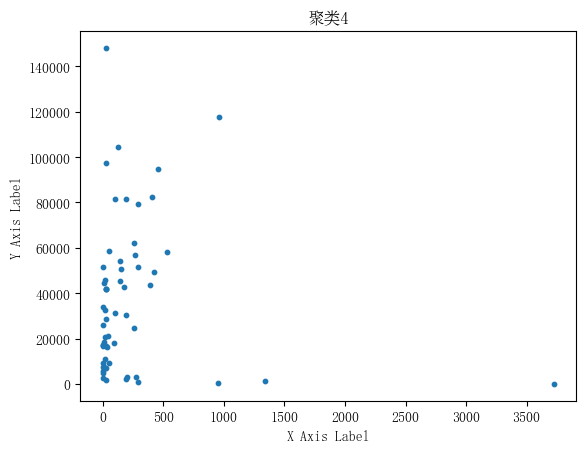

In [46]:
# 读取数据
data = pd.read_excel('聚类4_1.xlsx', engine='openpyxl')

# 获取x和y的数据
x = data.iloc[:, 1]  # 第一列为x
y = data.iloc[:, 2]  # 第二列为y

# 设置点的大小
point_size = 10  # 你可以调整这个值来改变点的大小

# 绘制散点图
plt.scatter(x, y, s=point_size)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('聚类4')
plt.show()

In [47]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from scipy.optimize import curve_fit
# # 获取x和y的数据
# x = data.iloc[:, 1].values  # 第一列为x
# y = data.iloc[:, 2].values  # 第二列为y

# # 重塑x为2维数组
# x_matrix = x.reshape(-1, 1)
# y_matrix = y.reshape(-1, 1)
# combined_matrix = np.hstack((x_matrix, y_matrix))
# print(combined_matrix.shape)
# # 按x值排序
# sorted_indices = np.argsort(combined_matrix[:, 0])
# sorted_matrix = combined_matrix[sorted_indices]

# x = sorted_matrix[:, 0]
# y = sorted_matrix[:, 1]

# # 使用numpy的polyfit进行多项式拟合
# coefficients = np.polyfit(x, y, 5)

# # 使用拟合的系数创建一个多项式函数
# polynomial = np.poly1d(coefficients)

# y_fit = polynomial(x)

# # 绘制原始数据和拟合的多项式曲线
# plt.scatter(x, y, label="Data", color='blue',s=point_size)
# plt.plot(x, y_fit, label="Fitted polynomial", color='red')
# plt.legend()
# plt.title('Polynomial Fit')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

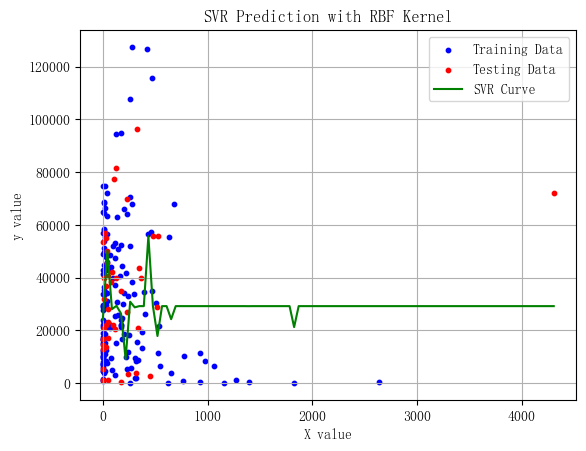

[29173.87096876]


In [48]:
from sklearn.model_selection import train_test_split  # 导入train_test_split函数
from sklearn.svm import SVR  # 导入SVR模型
from scipy.optimize import curve_fit  # 导入curve_fit函数
# 分割特征和目标值
X = combined_matrix[:, 0].reshape(-1, 1)
y = combined_matrix[:, 1]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVR模型，使用 'rbf' 核
svr = SVR(kernel='rbf', C=1e5, gamma=0.5)

# 训练模型
svr.fit(X_train, y_train)

# 进行预测
y_pred = svr.predict(X_test)

# 绘制训练数据、测试数据和SVR预测曲线
plt.scatter(X_train, y_train, color='blue', label='Training Data',s=point_size)
plt.scatter(X_test, y_test, color='red', label='Testing Data',s=point_size)

# 使用 SVR 预测整个X范围内的y值以得到完整的曲线
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = svr.predict(X_range)
plt.plot(X_range, y_range_pred, color='green', label='SVR Curve')

plt.xlabel('X value')
plt.ylabel('y value')
plt.title('SVR Prediction with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()


# 提供一个新的x值
new_x_value = np.array([[500]])  # 假设你想预测x=5时的y值
# 使用模型进行预测
predicted_y_value = svr.predict(new_x_value)
print(predicted_y_value)

In [49]:
# 读取.xlsx文件
file_path = '聚类4_1.xlsx'  # 请替换为你的文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 使用第二列作为x
x = df.iloc[:, 1].values  # 0-based index，第二列的索引为1

# 遍历表格的每一行，计算预测值并填入第四列
predicted_y_values = []
for index, row in df.iterrows():
    new_x_value = np.array([[row[2]]])  # 使用第三列的值作为新的 x
    predicted_y_value = svr.predict(new_x_value)
    predicted_y_values.append(predicted_y_value[0])

df['预测值'] = predicted_y_values  # 将预测值添加到第四列

# 保存修改后的.xlsx文件
df.to_excel("聚类4_2.xlsx", index=False, engine='openpyxl')
# 读取.xlsx文件
df = pd.read_excel('聚类4_2.xlsx')

# 计算第二列减去第四列的结果，并将结果放入第五列
df['残差值'] = df.iloc[:, 2] - df.iloc[:, 3]

# 保存修改后的文件
df.to_excel('聚类4_3.xlsx', index=False)
# 删除第二列和第三列
df.drop(columns=[df.columns[1], df.columns[2], df.columns[3]], inplace=True)

# 保存修改后的文件
df.to_excel('聚类4_4.xlsx', index=False)
# 读取原始的.xlsx文件
df = pd.read_excel('聚类4_4.xlsx')

# 使用groupby将数据按照患者分组，并对残差值进行求和
grouped = df.groupby('患者')['残差值'].sum().reset_index()

# 保存统计结果到一个新的.xlsx文件
grouped.to_excel('聚类4_5.xlsx', index=False)

In [50]:
import pandas as pd

# 读取四个.xlsx表格
df1 = pd.read_excel('聚类1_5.xlsx')
df2 = pd.read_excel('聚类2_5.xlsx')
df3 = pd.read_excel('聚类3_5.xlsx')
df4 = pd.read_excel('聚类4_5.xlsx')

# 合并表格
merged_df = pd.concat([df1, df2, df3, df4])

# 按照第一列进行排序
sorted_df = merged_df.sort_values(by='患者')

# 将排序后的结果保存为一个新的.xlsx文件
sorted_df.to_excel('最终聚类结果.xlsx', index=False)
